In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
import astropy.constants as aconst
from time import monotonic
import random

In [2]:
def acc(ri,r):
    return -G*M*ri/(r**3)

def energy(x,y,z,vx,vy,vz,mi):
    rii = np.sqrt(x**2+y**2+z**2)
    vii = np.sqrt(vx**2+vy**2+vz**2)
    en_pot = -G*M*mi/rii
    en_kin = mi*vii**2/2.
    return en_pot, en_kin

def KDK(nsteps,r,v):
    en_pot[0], en_kin[0] = energy(r[0][0],r[1][0],r[2][0],v[0][0],v[1][0],v[2][0],mi)
    r0 = np.sqrt(r[0][0]**2+r[1][0]**2+r[2][0]**2)
    a[:,0] = acc(r[:,0],r0)
    for i in range(nsteps):
        # kick
        vi[:] = v[:,i]+a[:,i]*dt/2.
        # drift
        r[:,i+1] = r[:,i]+vi[:]*dt
        # kick
        rii = np.sqrt(r[0][i+1]**2+r[1][i+1]**2+r[2][i+1]**2)
        a[:,i+1] = acc(r[:,i+1],rii)
        v[:,i+1] = vi[:]+a[:,i+1]*dt/2.
        
        en_pot[i+1], en_kin[i+1] = energy(r[0][i+1],r[1][i+1],r[2][i+1],v[0][i+1],v[1][i+1],v[2][i+1],mi)
        t[i+1] = t[i]+dt
    return t, r, v, a, en_pot, en_kin

In [3]:
params = {'font.size': 16,
          'figure.figsize': (12.,8.),
          'axes.labelsize': 16,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16
         }
plt.rcParams.update(params)

# Spadek swobodny

In [4]:
pc = aconst.pc.value # m
m2pc = 1/pc
M_sun = aconst.M_sun.value # kg
kg2Ms = 1/M_sun
Myr = const.Julian_year*10**6 # s
s2Myr = 1/Myr
G = const.G*(m2pc)**3*(kg2Ms)**(-1)*(s2Myr)**(-2) # pc3 M_s-1 Myr-2
M = 10**12 # M_sun
mi = 1

time = 200 # Myr
dt = 1 # Myr
nsteps = int(time/dt)

dim = 3
r = np.zeros((dim,nsteps+1))
v = np.zeros((dim,nsteps+1))
a = np.zeros((dim,nsteps+1))
vi = np.zeros(dim)
t = np.zeros(nsteps+1)
en_pot = np.zeros(nsteps+1)
en_kin = np.zeros(nsteps+1)

r[0][0] = 8500. # pc
r[1][0] = 0.
r[2][0] = 0.

v[0][0] = 0.
v[1][0] = 0.
v[2][0] = 0.

start = monotonic()
t, r, v, a, en_pot, en_kin = KDK(nsteps,r,v)
end = monotonic()
print(f"Czas kompilacji: {end-start} s")

Czas kompilacji: 0.005929370998273953 s


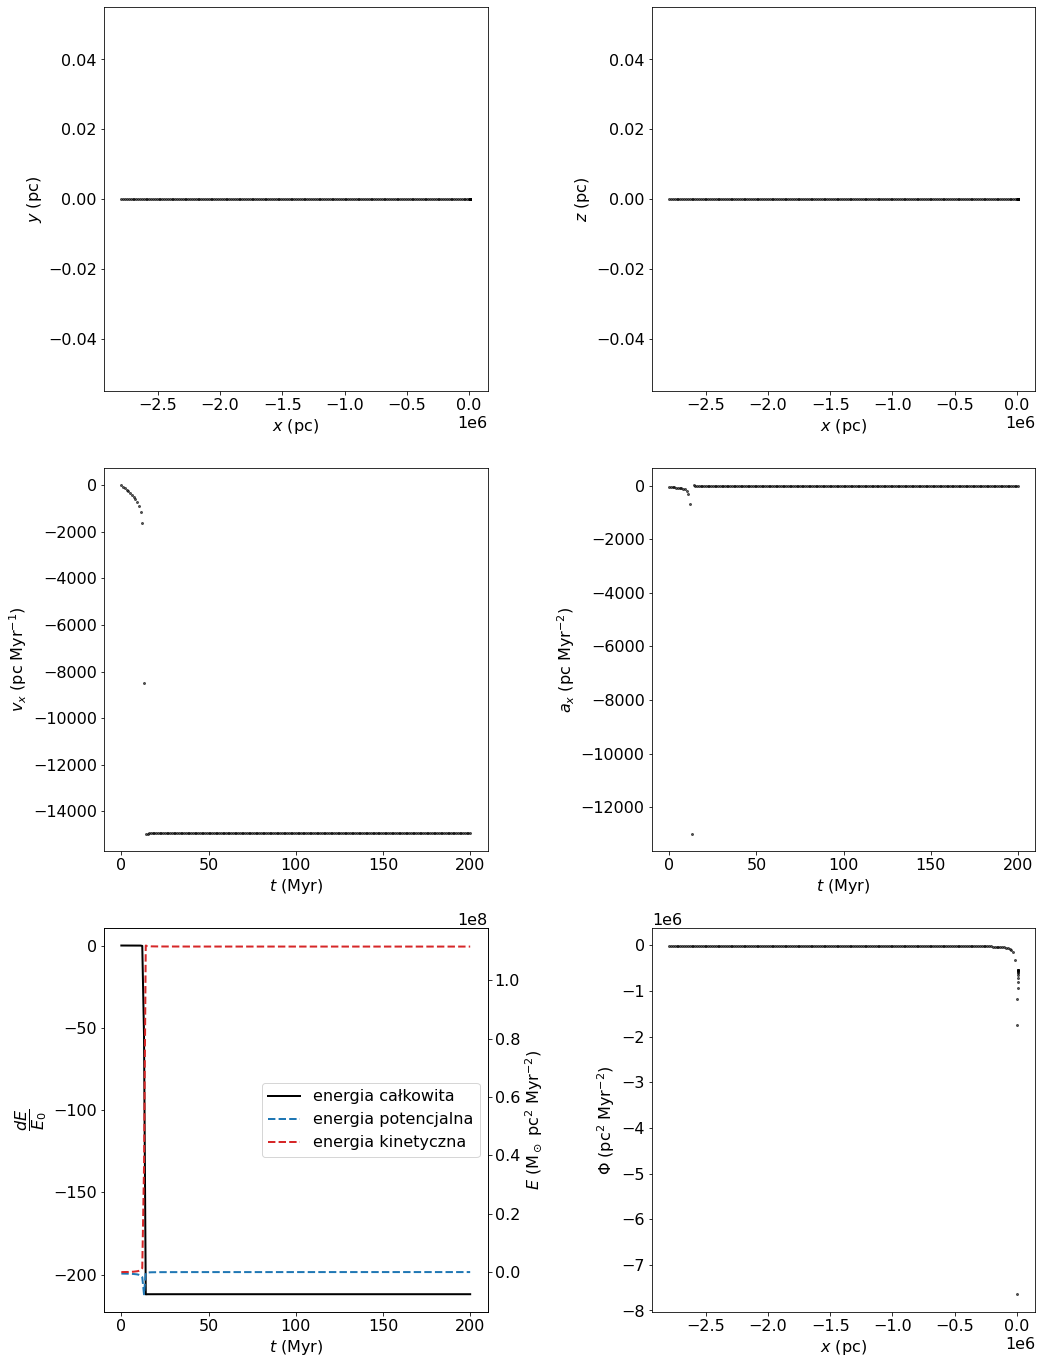

In [5]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,24))

ax[0,0].plot(r[0], r[1], ls='', marker='o', markersize=2, c='k', alpha=0.6)
ax[0,0].set_xlabel(r"$x$ (pc)")
ax[0,0].set_ylabel(r"$y$ (pc)")

ax[0,1].plot(r[0], r[2], ls='', marker='o', markersize=2, c='k', alpha=0.6)
ax[0,1].set_xlabel(r"$x$ (pc)")
ax[0,1].set_ylabel(r"$z$ (pc)")

ax[1,0].plot(t, v[0], ls='', marker='o', c='k', markersize=2, alpha=0.6)
ax[1,0].set_xlabel(r"$t$ (Myr)")
ax[1,0].set_ylabel(r"$v_x$ (pc Myr$^{-1}$)")

ax[1,1].plot(t, a[0], ls='', marker='o', c='k', markersize=2, alpha=0.6)
ax[1,1].set_xlabel(r"$t$ (Myr)")
ax[1,1].set_ylabel(r"$a_x$ (pc Myr$^{-2}$)")

tot = ax[2,0].plot(t, (en_pot+en_kin)/(en_pot[0]+en_kin[0])-1, ls='-', lw=2, c='k', label="energia całkowita")
ax[2,0].set_xlabel(r"$t$ (Myr)")
ax[2,0].set_ylabel(r"$\dfrac{dE}{E_0}$")

ax2=ax[2,0].twinx()
pot = ax2.plot(t, en_pot, ls='--', lw=2, c='tab:blue', label="energia potencjalna")
kin = ax2.plot(t, en_kin, ls='--', lw=2, c='tab:red', label="energia kinetyczna")
ax2.set_ylabel(r"$E$ (M$_\odot$ pc$^2$ Myr$^{-2}$)")

lns = tot+pot+kin
labs = [l.get_label() for l in lns]
lgnd = ax[2,0].legend(lns, labs, loc="center right")

ax[2,1].plot(r[0], -G*M/np.sqrt(r[0]**2+r[1]**2+r[2]**2), ls='', marker='o', markersize=2, c='k', alpha=0.6)
ax[2,1].set_xlabel(r"$x$ (pc)")
ax[2,1].set_ylabel(r"$\Phi$ (pc$^2$ Myr$^{-2}$)")

for i in range(3):
    for j in range(2):
        ax[i,j].set_box_aspect(1)

plt.savefig("ss1.png", dpi=300, bbox_inches='tight')

# Losowe prędkości

In [6]:
pc = aconst.pc.value # m
m2pc = 1/pc
M_sun = aconst.M_sun.value # kg
kg2Ms = 1/M_sun
Myr = const.Julian_year*10**6 # s
s2Myr = 1/Myr
G = const.G*(m2pc)**3*(kg2Ms)**(-1)*(s2Myr)**(-2) # pc3 M_s-1 Myr-2
M = 10**12 # M_sun
mi = 1

time = 1e+3 # Myr
dt = 1 # Myr
nsteps = int(time/dt)

dim = 3
r = np.zeros((dim,nsteps+1))
v = np.zeros((dim,nsteps+1))
a = np.zeros((dim,nsteps+1))
vi = np.zeros(dim)
t = np.zeros(nsteps+1)
en_pot = np.zeros(nsteps+1)
en_kin = np.zeros(nsteps+1)

r[0][0] = 8500. # pc
r[1][0] = 0.
r[2][0] = 0.

v[0][0] = random.choices(range(-100,100), k=1)[0]
v[1][0] = random.choices(range(-800,800), k=1)[0]
v[2][0] = random.choices(range(-100,100), k=1)[0]

start = monotonic()
t, r, v, a, en_pot, en_kin = KDK(nsteps,r,v)
end = monotonic()
print(f"Czas kompilacji: {end-start} s")

Czas kompilacji: 0.02848608000022068 s


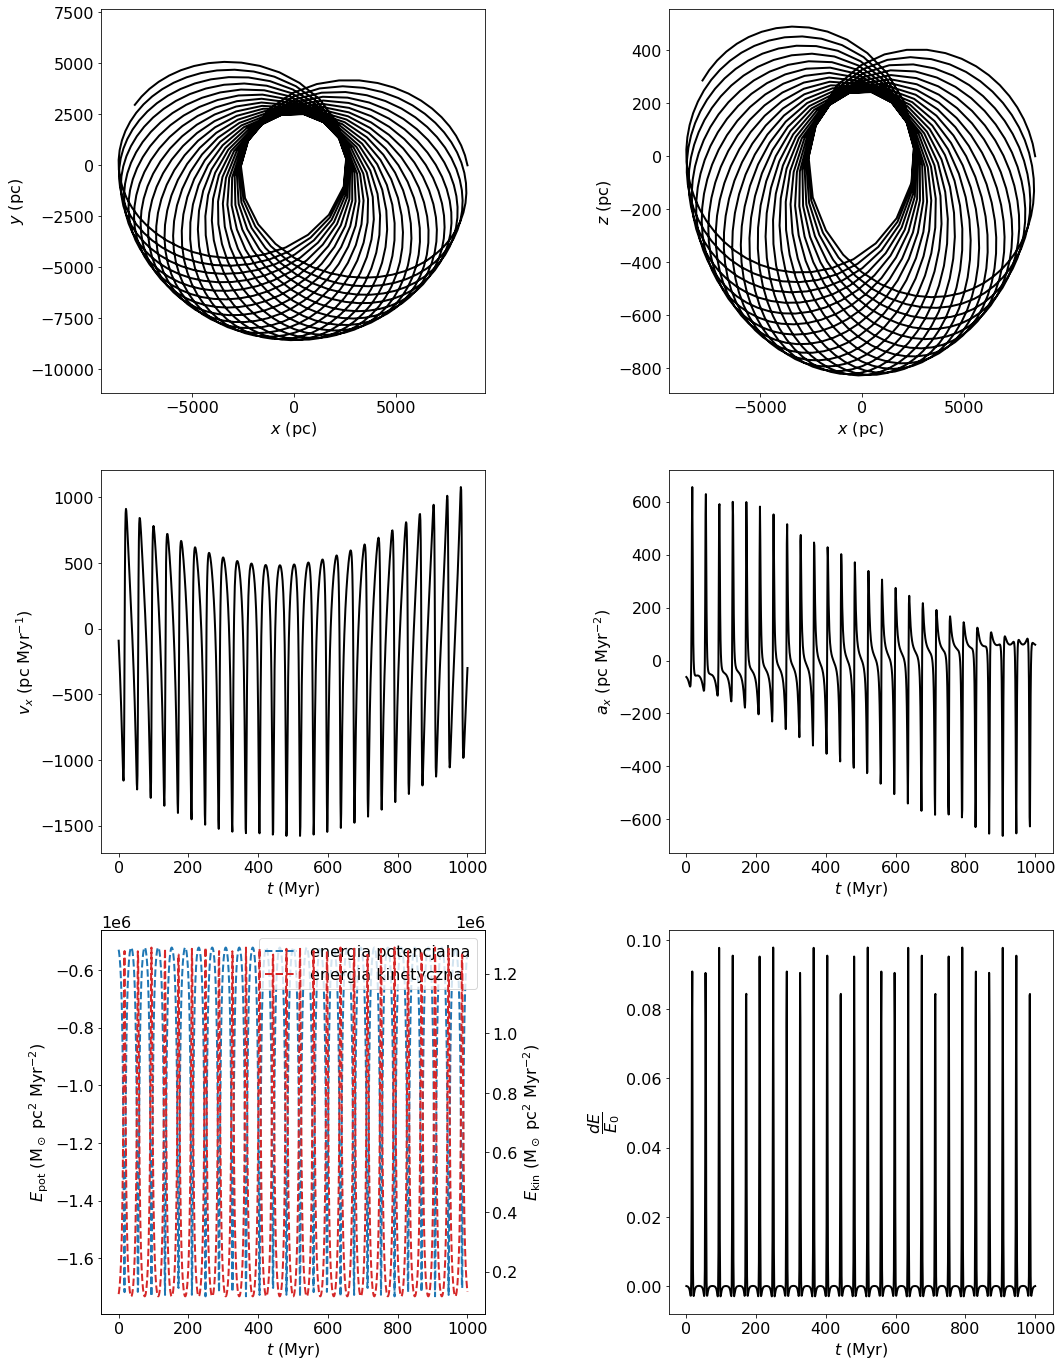

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,24))
fig.subplots_adjust(wspace=0.3)

ax[0,0].plot(r[0], r[1], lw=2, c='k')
ax[0,0].set_aspect('equal', 'box')
ax[0,0].set_xlabel(r"$x$ (pc)")
ax[0,0].set_ylabel(r"$y$ (pc)")

ax[0,1].plot(r[0], r[2], lw=2, c='k')
# ax[0,1].set_aspect('equal', 'box')
ax[0,1].set_xlabel(r"$x$ (pc)")
ax[0,1].set_ylabel(r"$z$ (pc)")

ax[1,0].plot(t, v[0], lw=2, c='k')
ax[1,0].set_xlabel(r"$t$ (Myr)")
ax[1,0].set_ylabel(r"$v_x$ (pc Myr$^{-1}$)")

ax[1,1].plot(t, a[0], lw=2, c='k')
ax[1,1].set_xlabel(r"$t$ (Myr)")
ax[1,1].set_ylabel(r"$a_x$ (pc Myr$^{-2}$)")

pot = ax[2,0].plot(t, en_pot, ls='--', lw=2, c='tab:blue', label="energia potencjalna")
ax[2,0].set_xlabel(r"$t$ (Myr)")
ax[2,0].set_ylabel(r"$E_\mathrm{pot}$ (M$_\odot$ pc$^2$ Myr$^{-2}$)")
ax2=ax[2,0].twinx()
kin = ax2.plot(t, en_kin, ls='--', lw=2, c='tab:red', label="energia kinetyczna")
ax2.set_ylabel(r"$E_\mathrm{kin}$ (M$_\odot$ pc$^2$ Myr$^{-2}$)")

lns = pot+kin
labs = [l.get_label() for l in lns]
lgnd = ax[2,0].legend(lns, labs, loc="upper right")

ax[2,1].plot(t, (en_pot+en_kin)/(en_pot[0]+en_kin[0])-1, ls='-', lw=2, c='k', label="energia całkowita")
ax[2,1].set_xlabel(r"$t$ (Myr)")
ax[2,1].set_ylabel(r"$\dfrac{dE}{E_0}$")

for i in range(3):
    for j in range(2):
        ax[i,j].set_box_aspect(1)

plt.savefig("lp1.png", dpi=300, bbox_inches='tight')

# Orbita kołowa

In [8]:
pc = aconst.pc.value # m
m2pc = 1/pc
M_sun = aconst.M_sun.value # kg
kg2Ms = 1/M_sun
Myr = const.Julian_year*10**6 # s
s2Myr = 1/Myr
G = const.G*(m2pc)**3*(kg2Ms)**(-1)*(s2Myr)**(-2) # pc3 M_s-1 Myr-2
M = 10**12 # M_sun
mi = 1

time = 250 # Myr
dt = 1 # Myr
nsteps = int(time/dt)

dim = 3
r = np.zeros((dim,nsteps+1))
v = np.zeros((dim,nsteps+1))
a = np.zeros((dim,nsteps+1))
vi = np.zeros(dim)
t = np.zeros(nsteps+1)
en_pot = np.zeros(nsteps+1)
en_kin = np.zeros(nsteps+1)

r[0][0] = 8000. # pc
r[1][0] = 0.
r[2][0] = 0.

r0 = np.sqrt(r[0][0]**2+r[1][0]**2+r[2][0]**2)
v[0][0] = 0.
v[1][0] = np.sqrt(G*M/r0)
v[2][0] = 0.

start = monotonic()
t, r, v, a, en_pot, en_kin = KDK(nsteps,r,v)
end = monotonic()
print(f"Czas kompilacji: {end-start} s")

Czas kompilacji: 0.006244706999495975 s


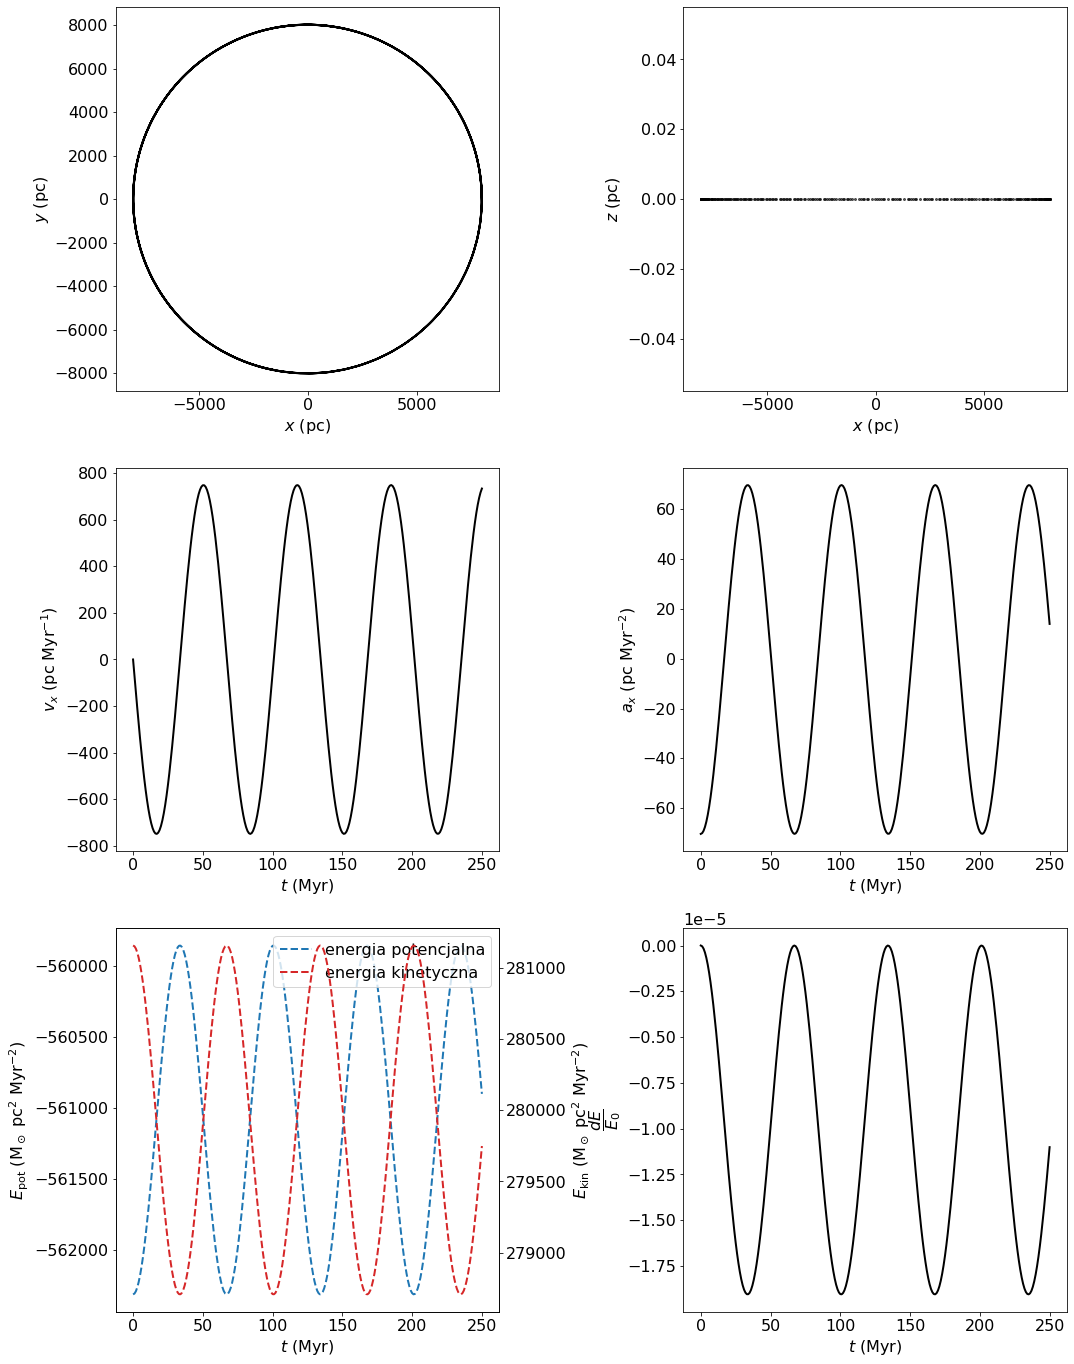

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,24))
fig.subplots_adjust(wspace=0.3)

ax[0,0].plot(r[0], r[1], lw=2, c='k')
ax[0,0].set_aspect('equal', 'box')
ax[0,0].set_xlabel(r"$x$ (pc)")
ax[0,0].set_ylabel(r"$y$ (pc)")

ax[0,1].plot(r[0], r[2], ls='', marker='o', markersize=2, c='k', alpha=0.6)
ax[0,1].set_xlabel(r"$x$ (pc)")
ax[0,1].set_ylabel(r"$z$ (pc)")

ax[1,0].plot(t, v[0], lw=2, c='k')
ax[1,0].set_xlabel(r"$t$ (Myr)")
ax[1,0].set_ylabel(r"$v_x$ (pc Myr$^{-1}$)")

ax[1,1].plot(t, a[0], lw=2, c='k')
ax[1,1].set_xlabel(r"$t$ (Myr)")
ax[1,1].set_ylabel(r"$a_x$ (pc Myr$^{-2}$)")

pot = ax[2,0].plot(t, en_pot, ls='--', lw=2, c='tab:blue', label="energia potencjalna")
ax[2,0].set_xlabel(r"$t$ (Myr)")
ax[2,0].set_ylabel(r"$E_\mathrm{pot}$ (M$_\odot$ pc$^2$ Myr$^{-2}$)")
ax2=ax[2,0].twinx()
kin = ax2.plot(t, en_kin, ls='--', lw=2, c='tab:red', label="energia kinetyczna")
ax2.set_ylabel(r"$E_\mathrm{kin}$ (M$_\odot$ pc$^2$ Myr$^{-2}$)")

lns = pot+kin
labs = [l.get_label() for l in lns]
lgnd = ax[2,0].legend(lns, labs, loc="upper right")

ax[2,1].plot(t, (en_pot+en_kin)/(en_pot[0]+en_kin[0])-1, ls='-', lw=2, c='k', label="energia całkowita")
ax[2,1].set_xlabel(r"$t$ (Myr)")
ax[2,1].set_ylabel(r"$\dfrac{dE}{E_0}$")

for i in range(3):
    for j in range(2):
        ax[i,j].set_box_aspect(1)

plt.savefig("ok1.png", dpi=300, bbox_inches='tight')

# Orbita kołowa + niewielkie zaburzenie

In [16]:
pc = aconst.pc.value # m
m2pc = 1/pc
M_sun = aconst.M_sun.value # kg
kg2Ms = 1/M_sun
Myr = const.Julian_year*10**6 # s
s2Myr = 1/Myr
G = const.G*(m2pc)**3*(kg2Ms)**(-1)*(s2Myr)**(-2) # pc3 M_s-1 Myr-2
M = 10**12 # M_sun
mi = 1

time = 1e+3 # Myr
dt = 1 # Myr
nsteps = int(time/dt)

dim = 3
r = np.zeros((dim,nsteps+1))
v = np.zeros((dim,nsteps+1))
a = np.zeros((dim,nsteps+1))
vi = np.zeros(dim)
t = np.zeros(nsteps+1)
en_pot = np.zeros(nsteps+1)
en_kin = np.zeros(nsteps+1)

r[0][0] = 8000. # pc
r[1][0] = 0.
r[2][0] = 0.

r0 = np.sqrt(r[0][0]**2+r[1][0]**2+r[2][0]**2)
v[0][0] = random.choices(range(-100,100), k=1)[0]
v[1][0] = np.sqrt(G*M/r0)+random.choices(range(-100,100), k=1)[0]
v[2][0] = random.choices(range(-100,100), k=1)[0]

start = monotonic()
t, r, v, a, en_pot, en_kin = KDK(nsteps,r,v)
end = monotonic()
print(f"Czas kompilacji: {end-start} s")

Czas kompilacji: 0.02208771999903547 s


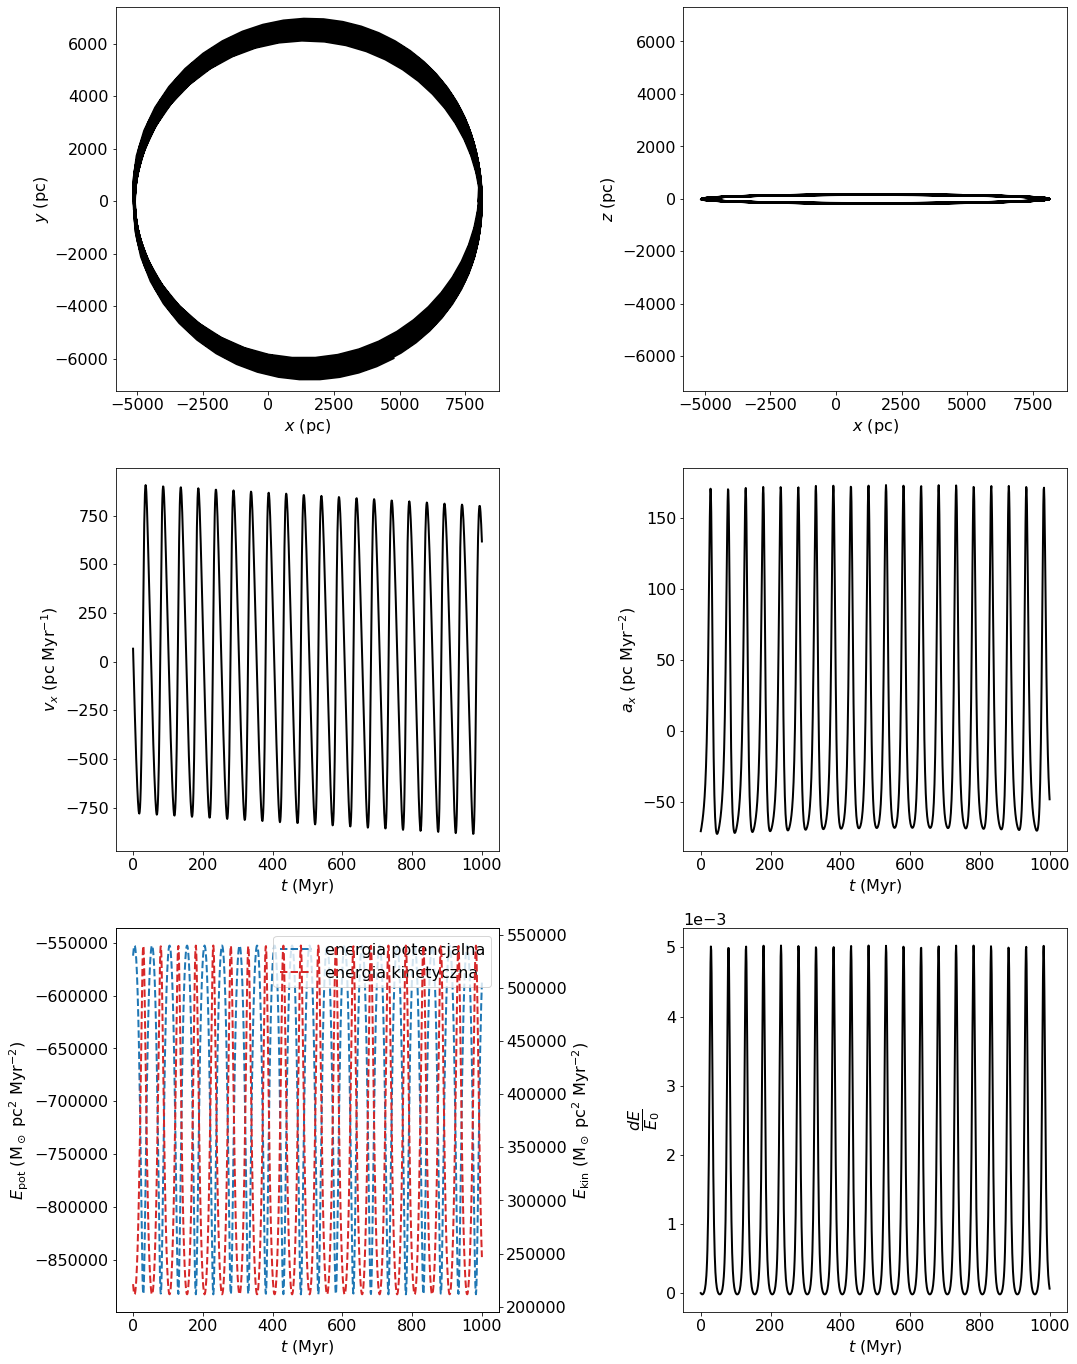

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,24))
fig.subplots_adjust(wspace=0.3)

ax[0,0].plot(r[0], r[1], lw=2, c='k')
ax[0,0].set_aspect('equal', 'box')
ax[0,0].set_xlabel(r"$x$ (pc)")
ax[0,0].set_ylabel(r"$y$ (pc)")

ax[0,1].plot(r[0], r[2], lw=2, c='k')
ax[0,1].set_aspect('equal', 'box')
ax[0,1].set_xlabel(r"$x$ (pc)")
ax[0,1].set_ylabel(r"$z$ (pc)")

ax[1,0].plot(t, v[0], lw=2, c='k')
ax[1,0].set_xlabel(r"$t$ (Myr)")
ax[1,0].set_ylabel(r"$v_x$ (pc Myr$^{-1}$)")

ax[1,1].plot(t, a[0], lw=2, c='k')
ax[1,1].set_xlabel(r"$t$ (Myr)")
ax[1,1].set_ylabel(r"$a_x$ (pc Myr$^{-2}$)")

pot = ax[2,0].plot(t, en_pot, ls='--', lw=2, c='tab:blue', label="energia potencjalna")
ax[2,0].set_xlabel(r"$t$ (Myr)")
ax[2,0].set_ylabel(r"$E_\mathrm{pot}$ (M$_\odot$ pc$^2$ Myr$^{-2}$)")
ax2=ax[2,0].twinx()
kin = ax2.plot(t, en_kin, ls='--', lw=2, c='tab:red', label="energia kinetyczna")
ax2.set_ylabel(r"$E_\mathrm{kin}$ (M$_\odot$ pc$^2$ Myr$^{-2}$)")

lns = pot+kin
labs = [l.get_label() for l in lns]
lgnd = ax[2,0].legend(lns, labs, loc="upper right")

ax[2,1].plot(t, (en_pot+en_kin)/(en_pot[0]+en_kin[0])-1, ls='-', lw=2, c='k', label="energia całkowita")
ax[2,1].set_xlabel(r"$t$ (Myr)")
ax[2,1].set_ylabel(r"$\dfrac{dE}{E_0}$")
ax[2,1].ticklabel_format(style="sci", axis='y', scilimits=(0,0))

for i in range(3):
    for j in range(2):
        ax[i,j].set_box_aspect(1)

plt.savefig("okz1.png", dpi=300, bbox_inches='tight')